### Author: Tejas J

# Statistical Project - Statistical Data Analysis on Insurance Database.
### Data Description:

### Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

### Attribute Information:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance.

### Learning Outcomes:

     Exploratory Data Analysis
     Practicing statistics using Python
     Hypothesis testing
### Objective:

We want to see if we can dive deep into this data to find some valuable insights.

### Steps and tasks:

### 1. Import the necessary libraries 

In [2]:
#importing the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, stats
from math import sqrt
from numpy import mean, var

### 2. Read the data as a data frame

In [3]:
data=pd.read_csv("F:\datasets\insurance.csv") #loading the dataset

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 3. Perform basic EDA which should include the following and print out your insights at every step.

### a. Shape of the data

In [5]:
data.shape #Shape of the data 

(1338, 7)

### b. Data type of each attribute

In [6]:
data.dtypes #Checking the datatypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

### c. Checking the presence of missing values 

In [7]:
data.isnull() #alternatively

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
null=data.isnull()
null.head()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [9]:
#alternatively

for i in null:
    if i=="True":
        print("There are null values")
    else:
        print("There are no null values")

There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values
There are no null values


In [10]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### d. 5 point summary of numerical attributes

In [11]:
#calculate a 5-number summary
from numpy import percentile


# calculate quartiles
NewData=data.loc[:,['age','bmi','children','expenses']]

quartiles = percentile(NewData, [25, 50, 75])

#calculate min/max
data_min, data_max = NewData.min(), NewData.max()

#print 5-number summary
print('Min:\n', data_min)
print('....'*10)
print('Q1:\n', quartiles)
print('Median:\n', quartiles)
print('Q3:\n', quartiles)
print('....'*10)
print('Max\n', data_max)



Min:
 age           18.00
bmi           16.00
children       0.00
expenses    1121.87
dtype: float64
........................................
Q1:
 [ 13.25    32.5    328.4675]
Median:
 [ 13.25    32.5    328.4675]
Q3:
 [ 13.25    32.5    328.4675]
........................................
Max
 age            64.00
bmi            53.10
children        5.00
expenses    63770.43
dtype: float64


In [12]:
data.describe()#over all summary description of the dataset

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Distribution of ‘bmi’, ‘age’ and ‘expenses’ columns.

In [13]:
#selecting only the necessary columns
DistData=data.loc[:,['bmi','age','expenses']]
DistData.head()

,bmi,age,expenses
0,27.9,19,16884.92
1,33.8,18,1725.55
2,33.0,28,4449.46
3,22.7,33,21984.47
4,28.9,32,3866.86


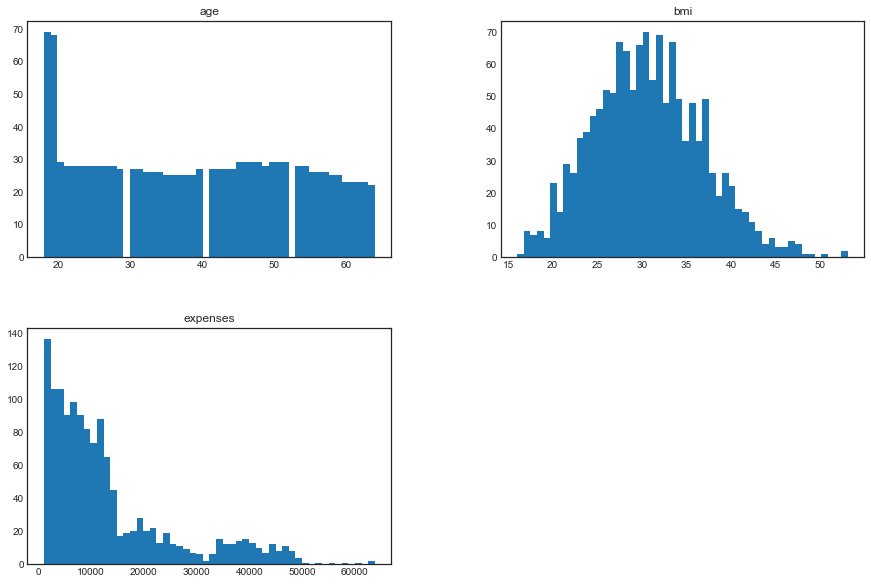

In [14]:
#A histogram distribution of the selected cloumns
plt.style.use('seaborn-white')
DistData.hist(bins=50, figsize=(15,10), grid=False)
plt.show()

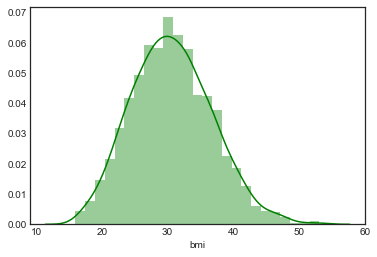

In [15]:
sns.distplot(DistData['bmi'],color='green')
plt.show()

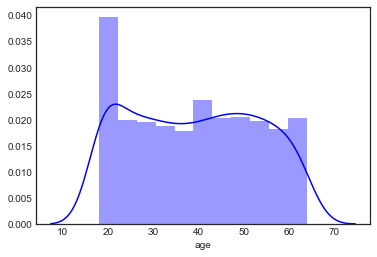

In [16]:
sns.distplot(DistData['age'],color='blue')
plt.show()

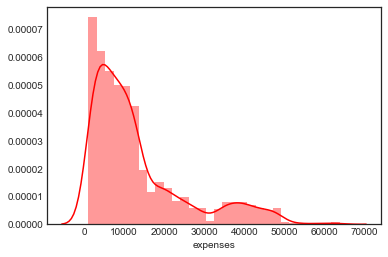

In [17]:
sns.distplot(DistData['expenses'], color='red')
plt.show()

In [18]:
#f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

DistData.skew()

bmi         0.284593
age         0.055673
expenses    1.515880
dtype: float64

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘expenses columns 


Checking outliers using the z-score

With Outlier

In [19]:
DistData.shape

(1338, 3)

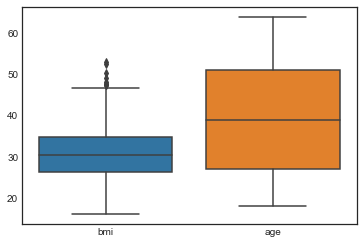

In [20]:
sns.boxplot(data=data.loc[:,['bmi','age']])

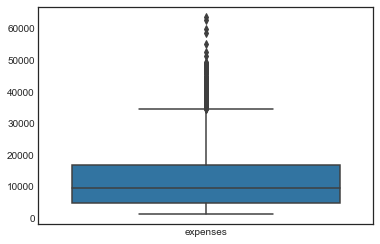

In [21]:
sns.boxplot(data=data.loc[:,['expenses']])

Without Outlier

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero.

These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers. You can relate this to the concept of central limit theorem.

We will use Z-score function defined in scipy library to detect the outliers.

In [22]:
from scipy import stats
stats.zscore(DistData)

array([[-0.4536457 , -1.43876426,  0.29858346],
       [ 0.51418574, -1.50996545, -0.95368938],
       [ 0.38295436, -0.79795355, -0.72867485],
       ...,
       [ 1.02270734, -1.50996545, -0.96159654],
       [-0.79812808, -1.29636188, -0.93036111],
       [-0.25679863,  1.55168573,  1.31105343]])

In [23]:
z=np.abs(stats.zscore(DistData))
print(z)

[[0.4536457  1.43876426 0.29858346]
 [0.51418574 1.50996545 0.95368938]
 [0.38295436 0.79795355 0.72867485]
 ...
 [1.02270734 1.50996545 0.96159654]
 [0.79812808 1.29636188 0.93036111]
 [0.25679863 1.55168573 1.31105343]]


Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [24]:
threshold = 3
print(np.where(z > 3))

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
      dtype=int64), array([2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0], dtype=int64))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[34][2] have a Z-score higher than 3.

In [25]:
print(z[34][2]) #at row number 34 and column 2 there is an outlier there

3.1328061331764863


In [26]:
print(z[116][0])

3.0239859154077884


In [27]:
DistData_WithoutOutlier = DistData[(z < 3).all(axis=1)] #removing the outlier

In [28]:
DistData.shape

(1338, 3)

In [29]:
DistData_WithoutOutlier.shape

(1327, 3)

In [30]:
#Alternatively using the interquartile range

# Q1 = DistData['age'].quantile(0.25)
# Q3 = DistData['age'].quantile(0.75)
# IQR = Q3 - Q1
# print(Q1)
# print(Q3)
# print(IQR)

In [31]:
# DistData1=DistData[~((DistData < (Q1 - 1.5 * IQR)) |(DistData> (Q3 + 1.5 * IQR))).any(axis=1)]

# DistData1.shap

### h. Distribution of categorical columns (include children)

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [33]:
#data.region.unique() 

In [34]:
ds=data.copy()
ds.drop(["expenses",'age','bmi'],axis=1,inplace=True)
print('                        ')
print(ds.head())
print('-----------*5')
print('Orginal Dataset')
print(data.head())
print('                  ')

                        
      sex  children smoker     region
0  female         0    yes  southwest
1    male         1     no  southeast
2    male         3     no  southeast
3    male         0     no  northwest
4    male         0     no  northwest
-----------*5
Orginal Dataset
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
                  


In [35]:
ds['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

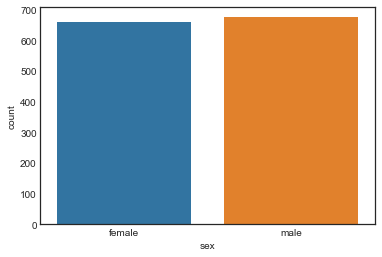

In [36]:
sns.countplot(x='sex',data=ds)

In [37]:
ds['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

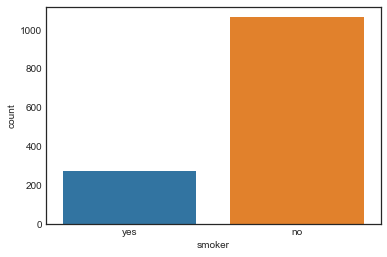

In [38]:
sns.countplot(x='smoker', data=ds)

In [39]:
ds['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

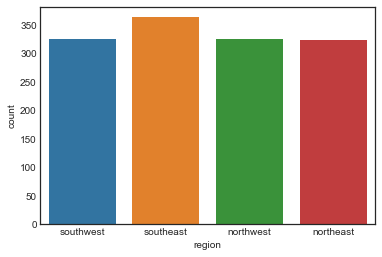

In [40]:
sns.countplot(x='region',data=ds)

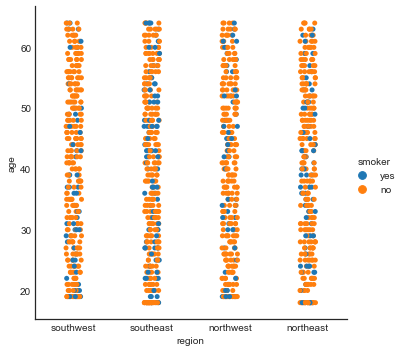

In [41]:
#Distribution of categorical columns by region and age

sns.catplot(x='region',y='age',hue='smoker',data=data)


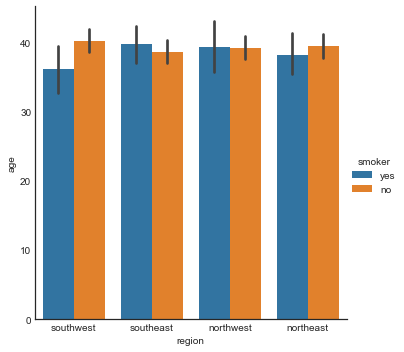

In [42]:
sns.catplot(x='region',y='age',hue='smoker',data=data,kind='bar')

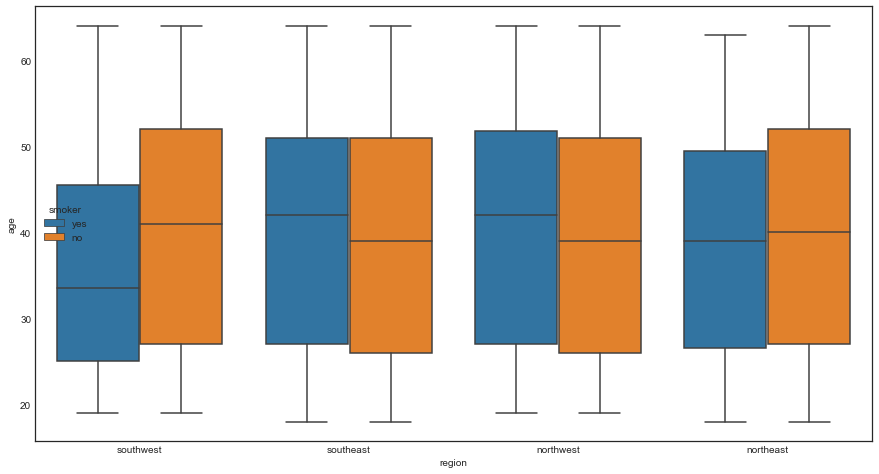

In [43]:
plt.figure(figsize=(15, 8))

sns.boxplot(x='region',y='age',hue='smoker',data=data)

### i. Pair plot that includes all the columns of the data frame

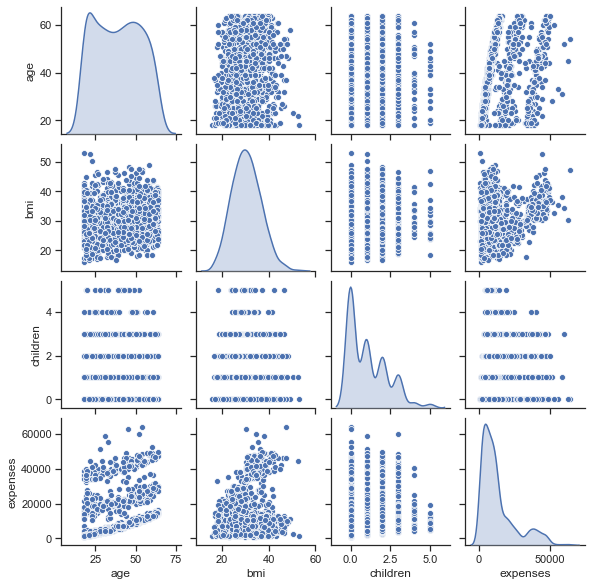

In [44]:
sns.set(style='ticks', color_codes=False)

g=sns.pairplot(data,height=2,diag_kind='kde')

In [45]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [46]:
# Replacing string values to numbers
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get) 
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [47]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,3,21984.47
4,32,0,28.9,0,0,3,3866.86


### Alternative method

In [48]:
# from sklearn.preprocessing import LabelEncoder
# #smoker
# labelencoder_smoker = LabelEncoder()
# data.smoker = labelencoder_smoker.fit_transform(data.smoker)
# #sex
# labelencoder_sex = LabelEncoder()
# data.sex = labelencoder_sex.fit_transform(data.sex)
# #region
# labelencoder_region = LabelEncoder()
# data.region = labelencoder_region.fit_transform(data.region)

# try with all data at once

### 4. Answer the following questions with statistical evidence


### a. Do charges of people who smoke differ significantly from the people who don't?

Hypothesis

### Null Hypothesis:

Charges of people who smoke differ significantly from people who don't

### Alternative Hypothesis:

Charges of people who smoke does not differ significantly from people who don't

Text(0.5, 1.0, 'Overall distribution of charges comparing smokers and non-smokers')

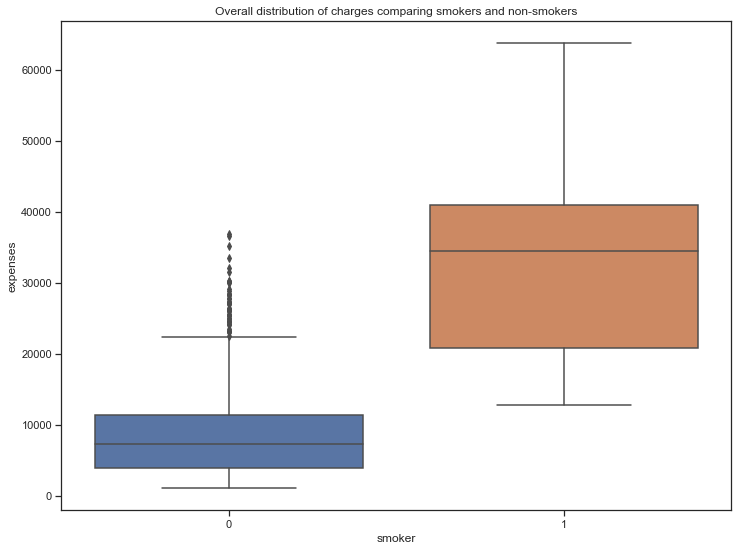

In [49]:
#boxplot showing the distribution of charges of smokers and non-smokers
plt.figure(figsize=(12,9))
sns.boxplot(x='smoker',y='expenses',data=data)
plt.title("Overall distribution of charges comparing smokers and non-smokers")

Also confirming with a joinplot

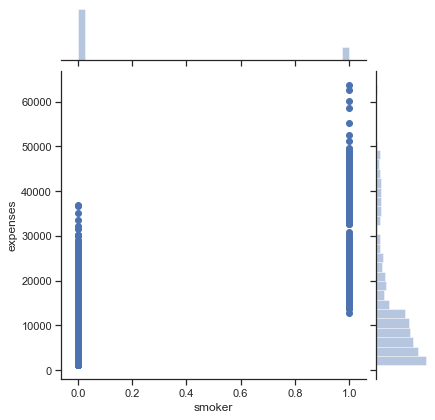

In [50]:
# Correlation betweeen 'expenses' and 'smoker' 
sns.jointplot(x=data['smoker'],y=data['expenses'])

In [51]:
smoker_ = data[data['smoker']==1]
non_smoker = data[data['smoker']==0]

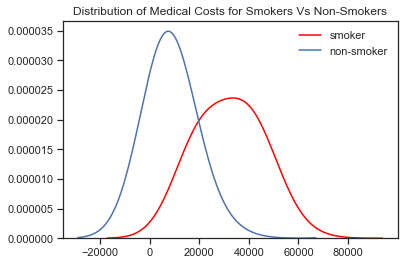

In [52]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker_['expenses'], bw=10000, label='smoker', color='r')
ax = sns.kdeplot(non_smoker['expenses'], bw=10000, label='non-smoker')
plt.show()

In [53]:
#Computing the P-Value with 0.05 confidence level.

# statistic, pvalue = stats.ttest_ind(non_smoker['charges'], smoker_['charges'], equal_var = False)
# print("2 sample and 2 sided t-test t-stat:  {} and pvalue: {} respecctively".format(statistic,pvalue))
# #Explore the cohen function




In [54]:
# # function to calculate Cohen's d for independent samples
# def cohend(d1, d2):
#     n1, n2 = len(d1), len(d2)
#     s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
#     s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
#     u1, u2 = mean(d1), mean(d2)
#     return (u1 - u2) / s

# d = cohend(smoker_['charges'], non_smoker['charges'])
# print("cohen's d:  {}".format(d))

#As can be seen from the above demonstrations, the p-value is computed as 5.88946444671698e-103, 
#which is significantly smaller than the 0.05% confidence level. Also, Cohen's D indicates that the difference between the means is more than 3 standard deviations which is large enough. 

### b. Does bmi of males differ significantly from that of females?

Hypothesis

### Null Hypothesis:

BMI of Males differ significantly from BMI of Females

### Alternative Hypothesis:

BMI of Males does not differ significantly from BMI of Females

In [55]:
male = data[data['smoker']==0]
female = data[data['smoker']==1]

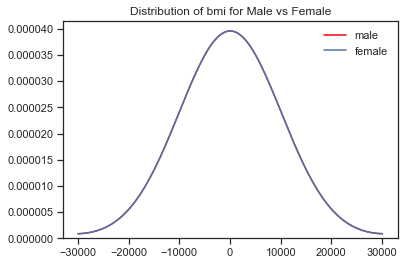

In [75]:
plt.title("Distribution of bmi for Male vs Female")
ax = sns.kdeplot(male['bmi'], bw=10000, label='male', color='r')
ax = sns.kdeplot(female['bmi'], bw=10000, label='female')
plt.show()

Text(0.5, 1.0, 'Comparing bmi for males and females')

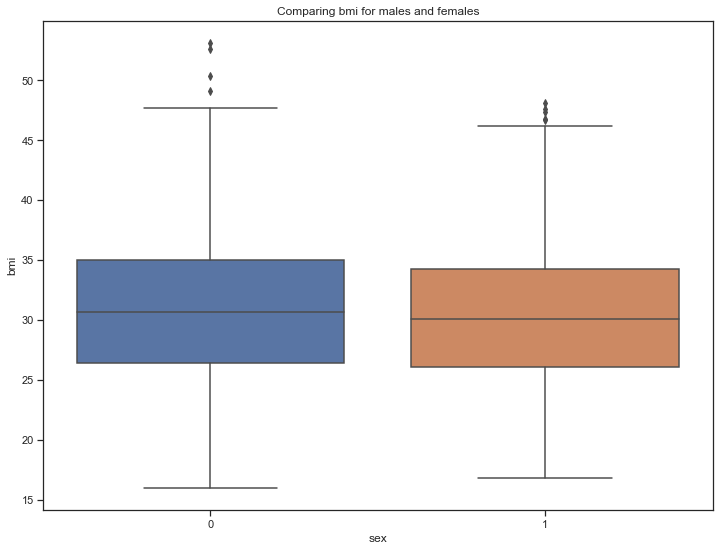

In [76]:
plt.figure(figsize=(12,9))
sns.boxplot(x='sex',y='bmi', data=data)
plt.title("Comparing bmi for males and females")

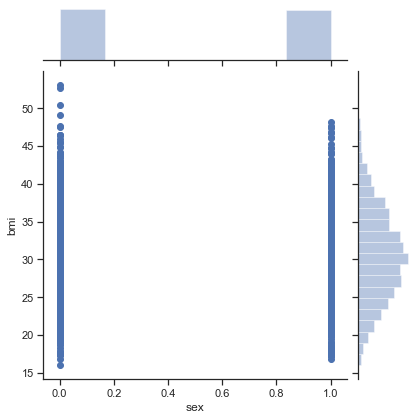

In [77]:
# Correlation betweeen 'expenses' and 'smoker' 
sns.jointplot(x=data['sex'],y=data['bmi'])

In [78]:
# statistic, pvalue = stats.ttest_ind(data['sex'], data['bmi'], equal_var = False)
# print("2 sample and 2 sided t-test t-stat:  {} and pvalue: {} ".format(statistic,pvalue))

### b. Is the proportion of smokers significantly different in different genders?

Hypothesis

### Null Hypothesis:

Proportion of smokers is significantly different in different genders

### Alternative Hypothesis:

Proportion of smokers is not significantly different in different genders

For data convenience, let's load our dataset again

In [79]:
data=pd.read_csv("F:\datasets\insurance.csv")

In [80]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [82]:
female_smokers=(data['sex']=='female') & (data['smoker']=='yes')
female_smokers

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Length: 1338, dtype: bool

In [83]:
female_smokers.value_counts()

False    1223
True      115
dtype: int64

In [84]:
male_smokers=(data['sex']=='male') & (data['smoker']=='yes')
male_smokers

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [85]:
male_smokers.value_counts()

False    1179
True      159
dtype: int64

In [88]:
#proportion of females who smoke
115/1338*100

8.594917787742899

In [87]:
#proportion of males who smoke
159/1338*100

11.883408071748878

### d. Is the distribution of bmi across women with no children, one child and two children, the same?

Hypothesis

### Null Hypothesis:

distribution of bmi across women with no children, one child and two children are the same

### Alternative Hypothesis:

distribution of bmi across women with no children, one child and two children, are not same

In [89]:
data_=data[data['children']<3]
data_.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62


Text(0.5, 1.0, 'Distribution of bmi across women with no children, one child and two children')

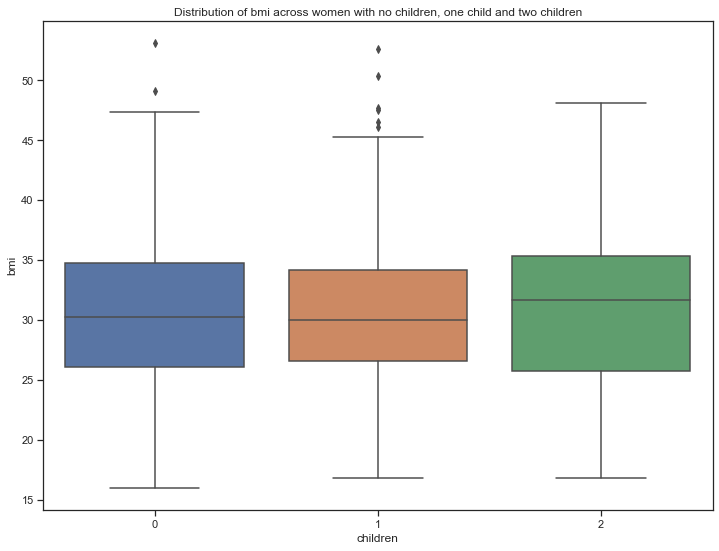

In [90]:
plt.figure(figsize=(12,9))
sns.boxplot(x=data_['children'],y=data_['bmi'],data=data_)
plt.title("Distribution of bmi across women with no children, one child and two children")

In [91]:
#sns.distplot( datac["children"] , color="blue")

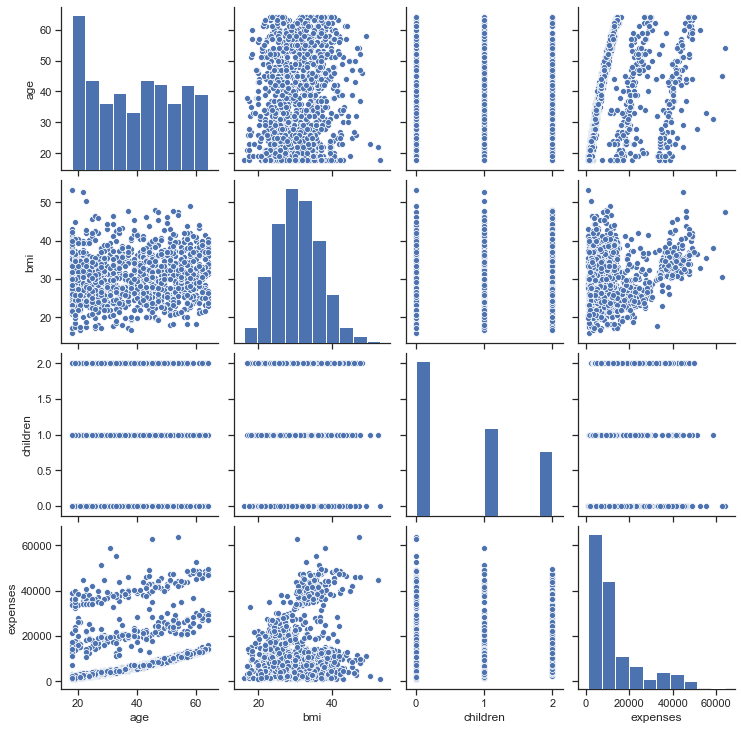

In [92]:
sns.pairplot(data_)